# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
# from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    """
    Функция генерации случайных величин из равномерного
    распределения на отрезке [0,1] с заданной точностью. 
    """
    product = np.prod(size)
    coin_precision = coin(precision*product) # генерируем броски монетки
    if type(size) == int:
        conv_tup = [size, precision]
    else:
        conv_tup = np.array(size).astype(int)
        conv_tup = np.insert (conv_tup, len(conv_tup), precision)
    coin_precision_spl = coin_precision.reshape(conv_tup)
    # переводим двоичное число из ячеек вдоль оси от precision в десятичное
    y = (coin_precision_spl*np.power(2, np.arange(precision-1,-1,-1))).sum(axis=-1)
    # т.к. надо переводить не 101..., а 0.101... в десятичное:
    y_answ = y / (np.power(2,precision))
    return y_answ


def plot_uniform_density(size=200):
    """
    Функция построения графиков с использованием точек из uniform. 
    """
    list = uniform(size=size, precision=10)
    plt.figure(figsize=(13, 6))
    plt.scatter(list, np.zeros(size), alpha=0.4)
    plt.hist(list, bins=10, density=True, alpha=0.4);
    grid = np.linspace(-0.25, 1.25, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.plot(grid, uniform_pdf(grid), lw=5)
    plt.title("Равномерное распределение на отрезке [0,1]")
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    """
    Функция построения графиков с использованием точек из uniform для разных precision. 
    """
    # определите график размера 15 на 3
    plt.figure(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        # plt.<определите подграфик>(3, 2, i + 1)
        plt.subplot(3, 2, i+1)
        # plt.<функция отрисовки точек>(
        #   <Сгенерируйте выборку размера size точности precision>,
        #   np.zeros(size),
        #   <прозрачность точки равна 0.4>
        # )
        plt.scatter(uniform(size=size, precision=precision), np.zeros(size), alpha=0.4)
        plt.suptitle("Значения случайных величин в зависимости от precision для U[0,1]")

        plt.yticks([])
        if i < 4:
            plt.xticks([])
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    """
    Функция генерации случайных величин в количестве size штук из распределения 
    N(loc,scale^2) с помощью преобразования Бокса-Мюллера.
    """
    uniform_1 = uniform(size,precision)
    uniform_2 = uniform(size,precision)
    N = np.multiply(np.cos(2*np.multiply(np.pi, uniform_1)), np.power((-2)*np.log(uniform_2), 1/2))
    N_2 = loc + np.multiply(scale,N)
    return N_2


def plot_normal_density(size=200):
    """
    Функция построения графиков с использованием точек из normal. 
    """
    list = normal(size, 0, 1, 10)
    plt.figure(figsize=(13, 6))
    plt.scatter(list, np.zeros(size), alpha=0.4)
    plt.hist(list, bins=10, density=True, alpha=0.4);
    grid = np.linspace(-3, 3, 500)  # равномерная сетка от -3 до 3 из 500 точек
    plt.plot(grid, norm_pdf(grid), lw=5)
    plt.title("Нормальное распределение N(0,1)")
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    """
    Функция expon генерации выборки из экспоненциального распределения.
    """
    uniform_3 = uniform(size,precision)
    Exp = np.multiply((-1 / lambd), np.log(1 - uniform_3))
    return Exp


def plot_expon_density(size=100):
    """
    Функция построения графиков с использованием точек из expon. 
    """
    list = expon(size, 1, 10)
    plt.figure(figsize=(13, 6))
    plt.scatter(list, np.zeros(size), alpha=0.4)
    plt.hist(list, bins=10, density=True, alpha=0.4);
    grid = np.linspace(-0.5, 5, 500)  # равномерная сетка от -0.5 до 5 из 500 точек
    plt.plot(grid, expon_pdf(grid), lw=5)
    plt.title("Экспоненциальное распределение при lambd = 1")
    return plt.gcf()

Равномерное распределение на отрезке [0,1] с точностью 0.5:

[0.53125 0.40625 0.4375  0.875   0.3125  0.53125 0.90625 0.15625 0.5625
 0.90625]
Figure(1300x600)
Figure(1500x300)


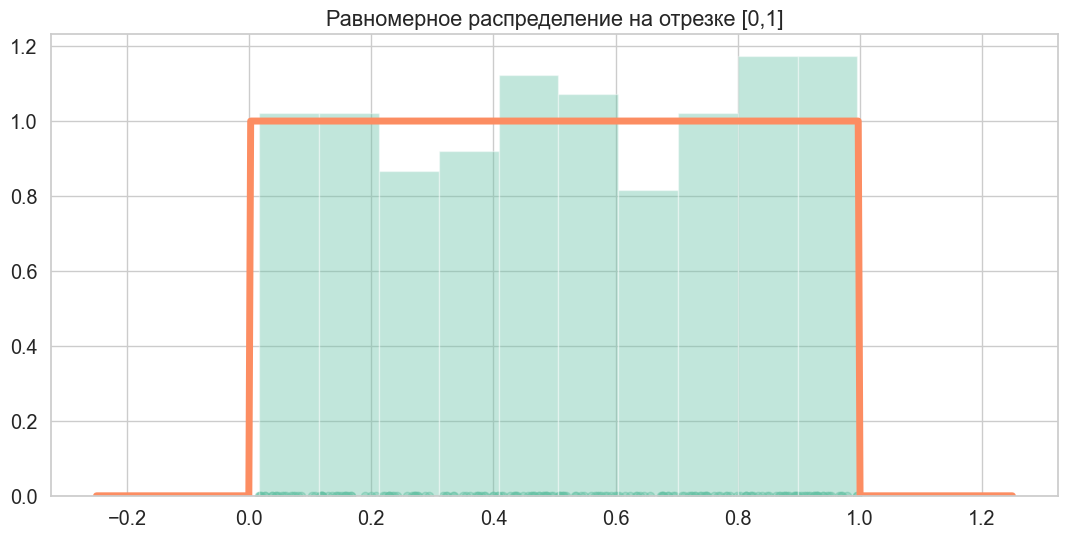

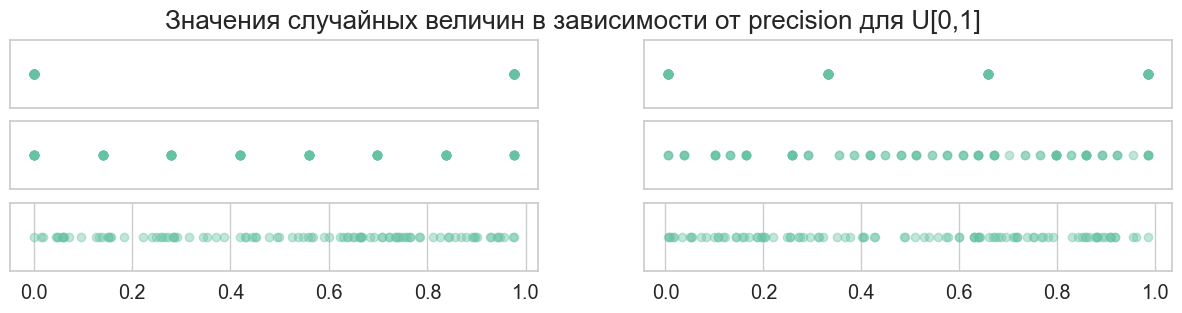

In [4]:
#result = (uniform((50,3),10))
result2 = (uniform(10,5))
#%time result = (uniform((50,30,50,40),10))
print(result2)
print(plot_uniform_density(size=200))
print(plot_uniform_different_precision(size=100))

Нормальное распределение на с параметрами 0 и 1:

[[ 1.97873016  0.69052741]
 [-1.47445623 -0.72562568]]
Figure(1300x600)


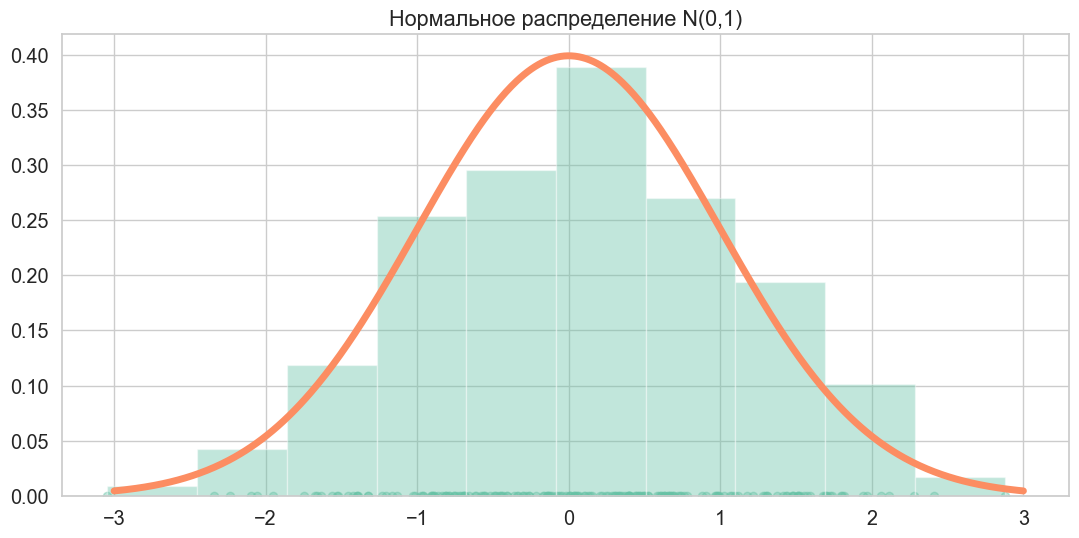

In [5]:
print(normal((2,2),0,1,30))
print(plot_normal_density(size=200))

Экспоненциальное распределение с лямбдой, которая равна 1.

[[0.66353083 0.61805452]
 [1.58112489 0.24546649]]
Figure(1300x600)


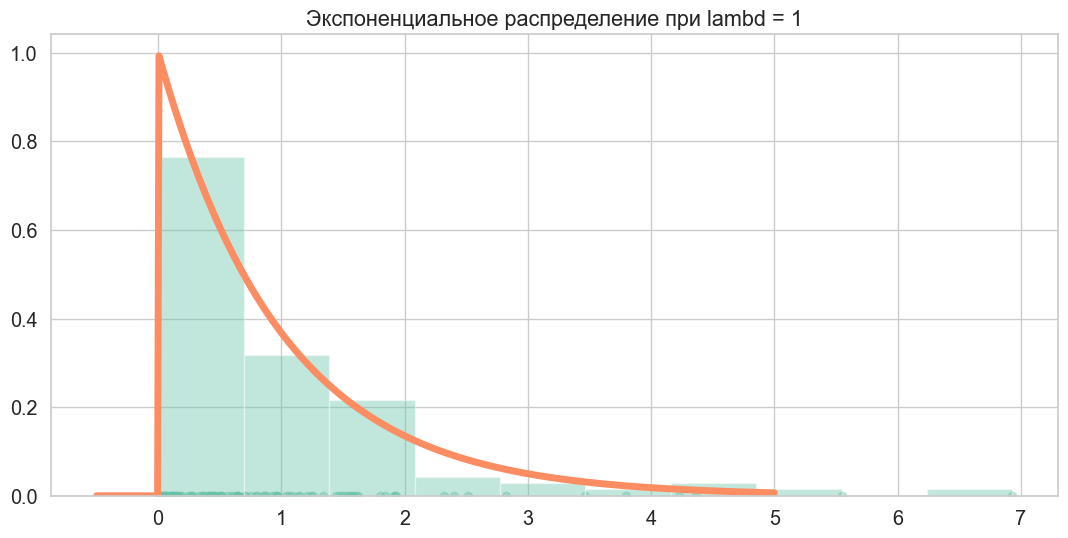

In [6]:
print(expon((2,2),1,30))
print(plot_expon_density(size=100))

**Выводы:**

Гистограмма, построенная по сгенерированным случайным величинам, соответствует графику плотности равномерного распределения. Чем больше величина precision, тем больше значений принимают случайные величины равномерного распределения на отрезке [0,1] с точностью 0.5.

Гистограмма, построенная по сгенерированным случайным величинам с использованием функции normal, визуально соответствует графику плотности нормального распределения N(0,1).

Гистограмма, построенная по сгенерированным случайным величинам с использованием функции expon, визуально соответствует графику плотности экспоненциального распределения с lambd = 1.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [7]:
def show_pdf_2(pdf, pdf_2,  xmin, xmax, ymax, grid_size, distr_name, label_1, label_2, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность 1-го распредениния
    pdf_2 - плотность 2-го распределения
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    label_1 - название 1 плотности
    label_1 - название 2 плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(10, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5, label=label_1)
    plt.plot(grid, pdf_2(grid, **kwargs), lw=5, label=label_2)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.legend(fontsize=14, loc=1)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

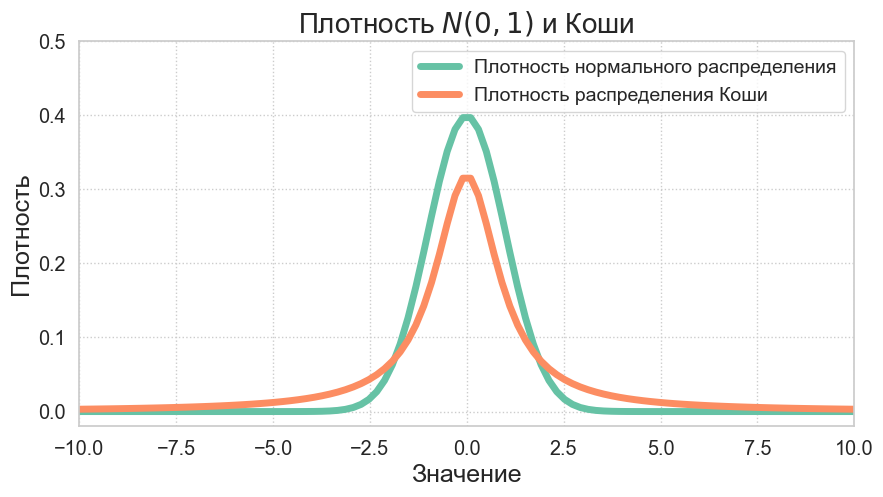

In [8]:
show_pdf_2(
    pdf=sps.norm.pdf, pdf_2=sps.cauchy.pdf, xmin=-10, xmax=10, ymax=0.5, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$ и Коши', loc=0, scale=1,
    label_1='Плотность нормального распределения', label_2='Плотность распределения Коши'
)

Видим, что максимальное значения графика плотности нормального распределения больше, чем у распределения Коши. Также на графике наблюдаются тяжелые хвосты, то есть плотность распределения Коши убывает медленнее при $x \to \infty$, чем плотность нормального распределения. 

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

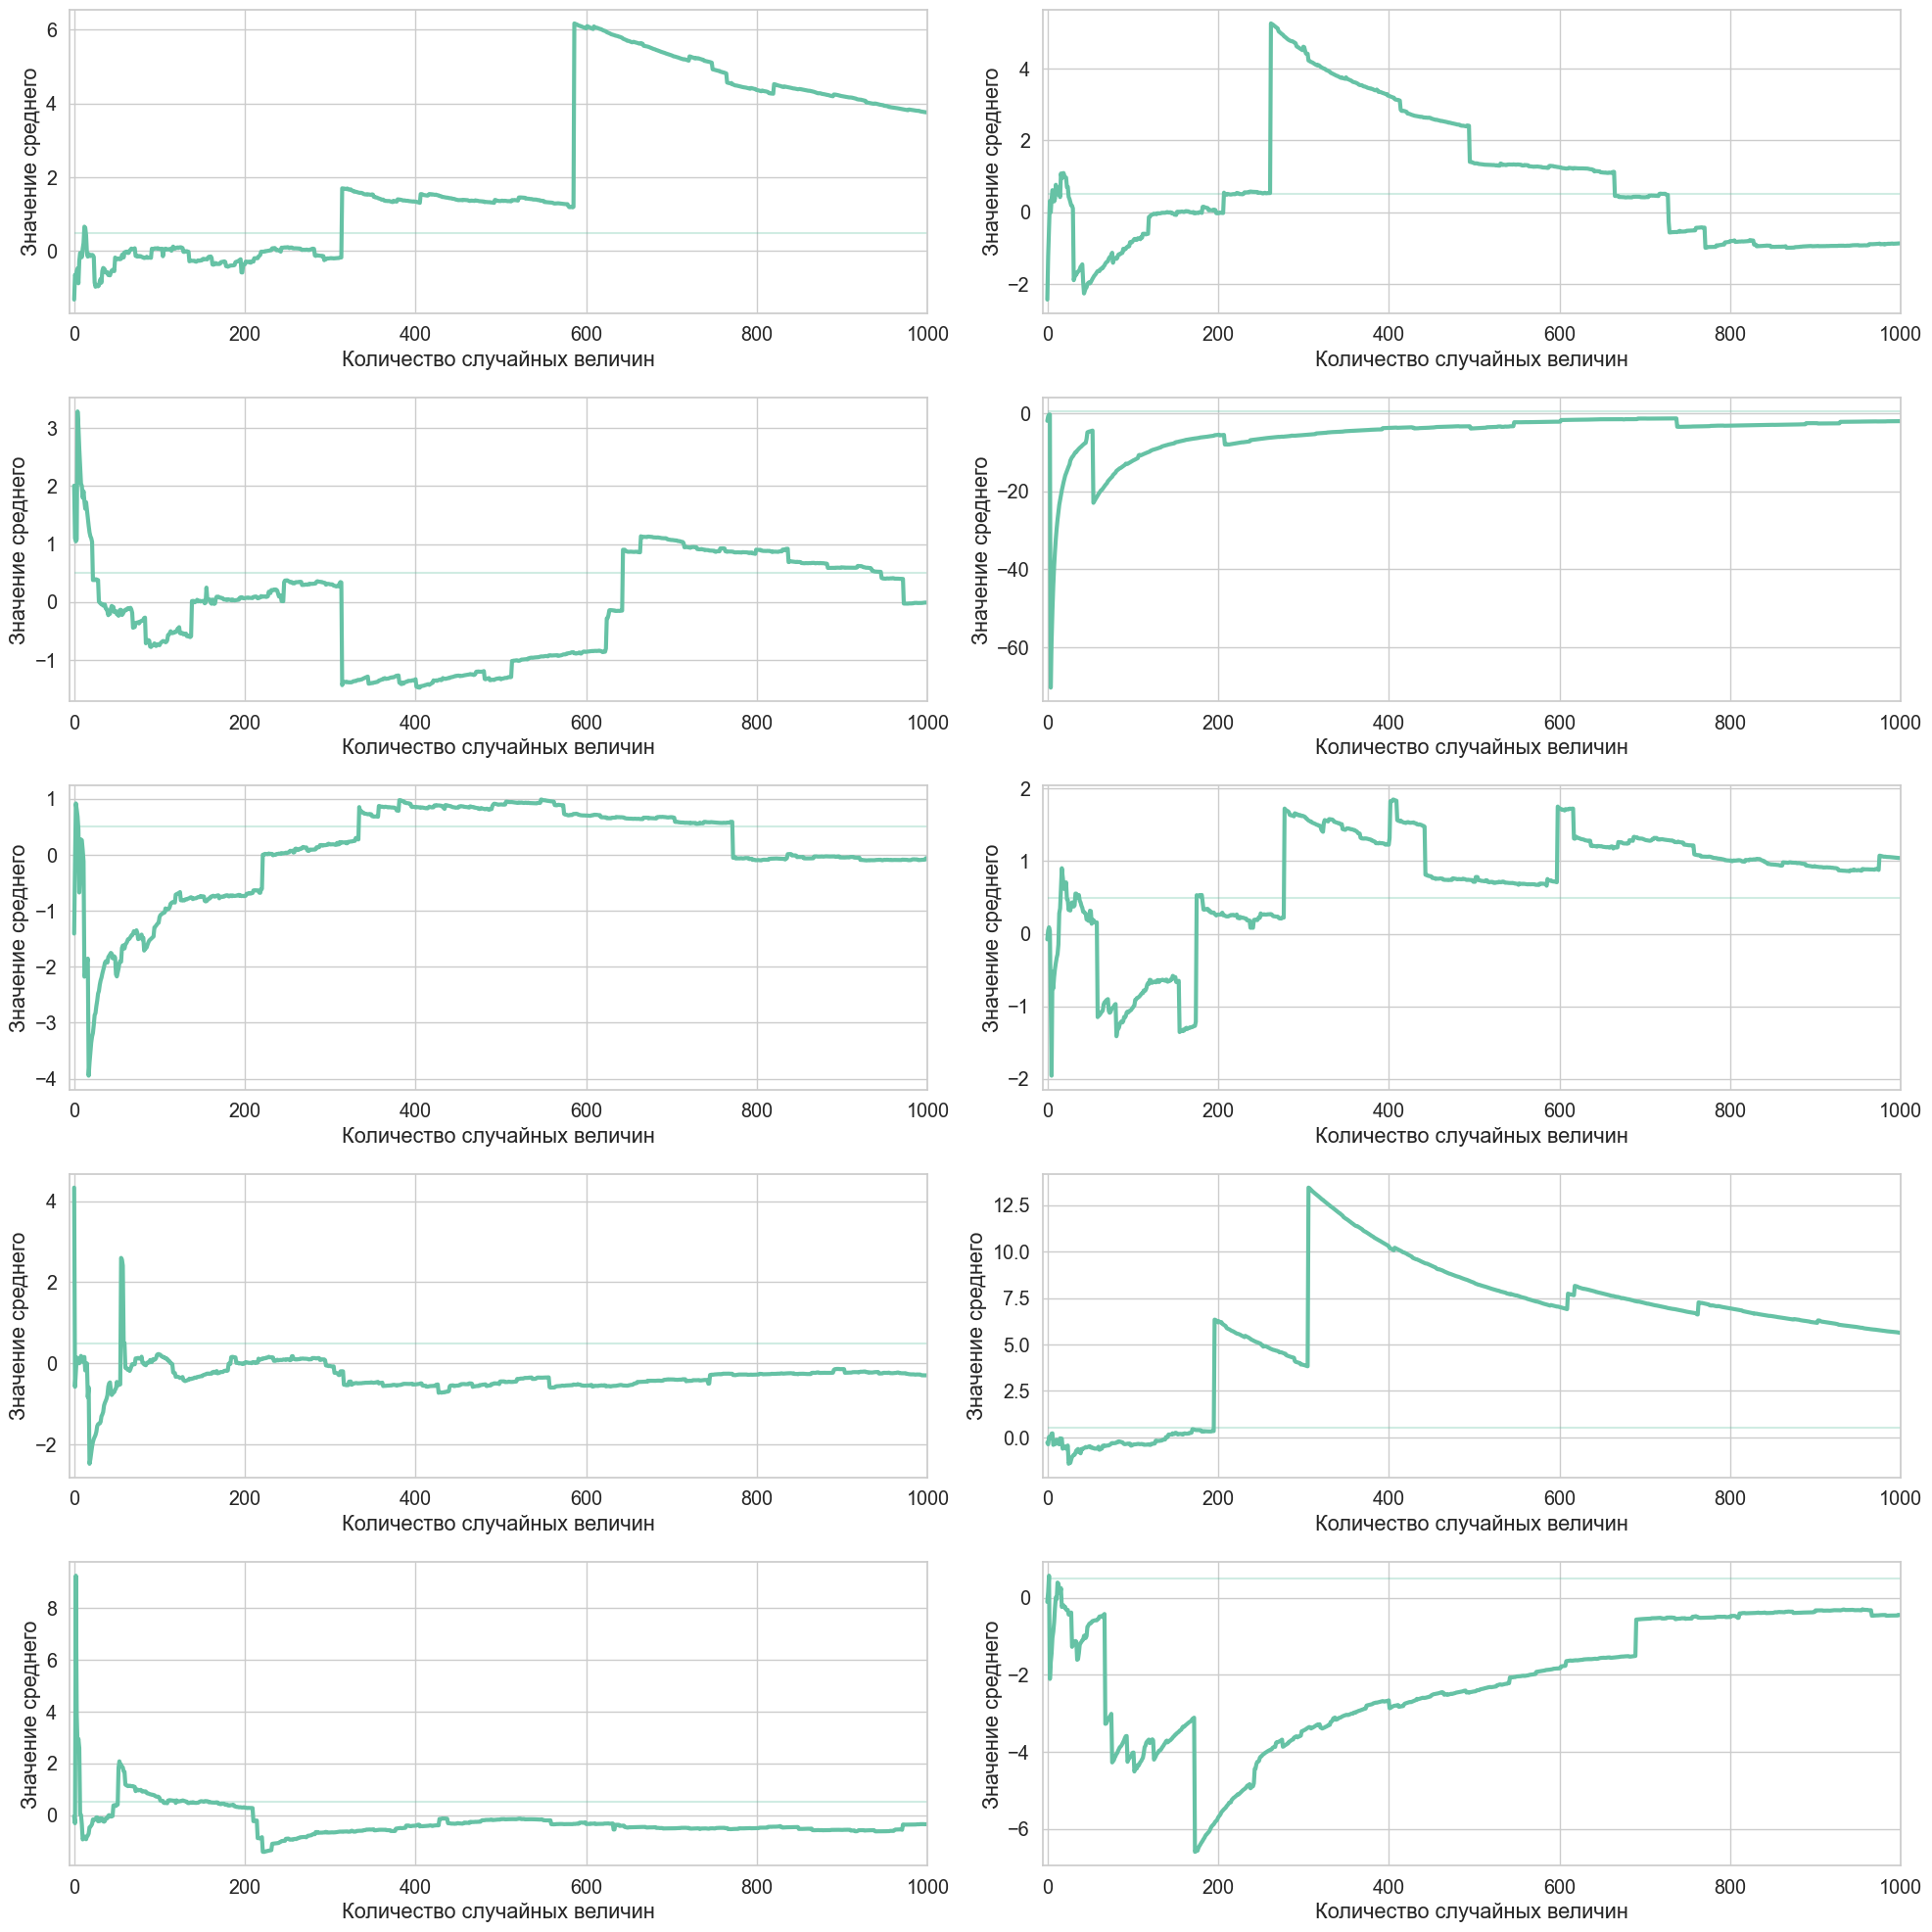

In [9]:
plt.figure(figsize=(20, 20))
size = 1000
# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

In [10]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

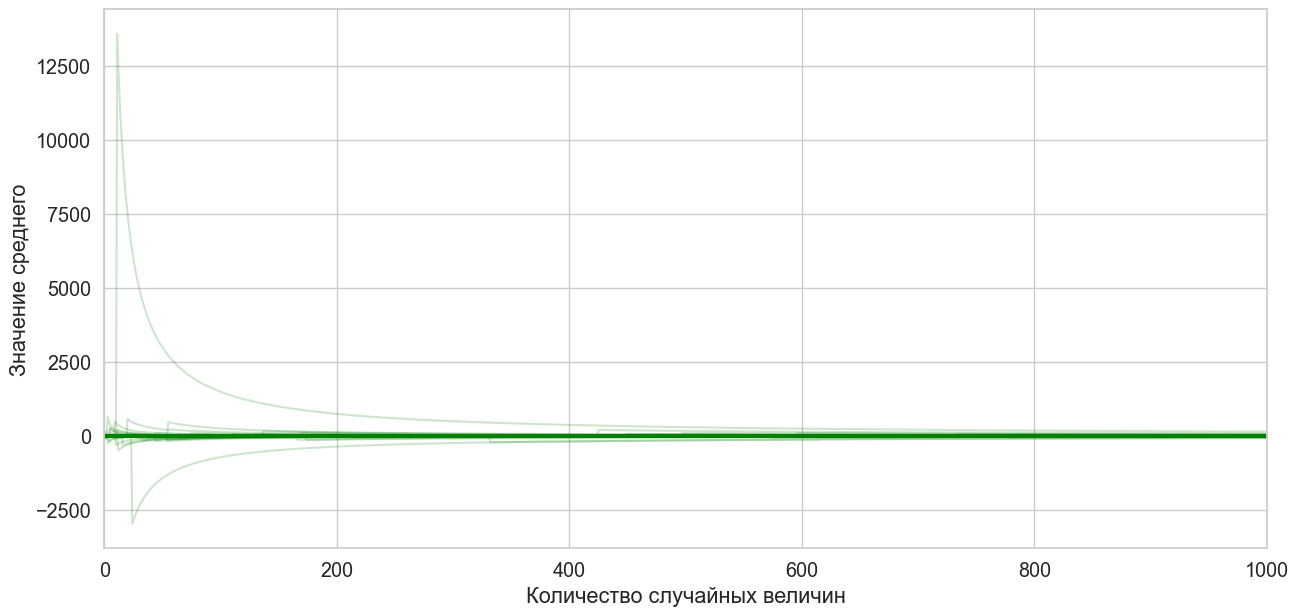

In [11]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.2)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Видим, что на графике есть некоторые кривые, которые сильно отличаются от остальных. Для последовательности независимых случайных величин, распределенных по Коши, закон больших чисел не выполняется. Так получилось, потому что у распределения Коши не существует математического ожидания.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

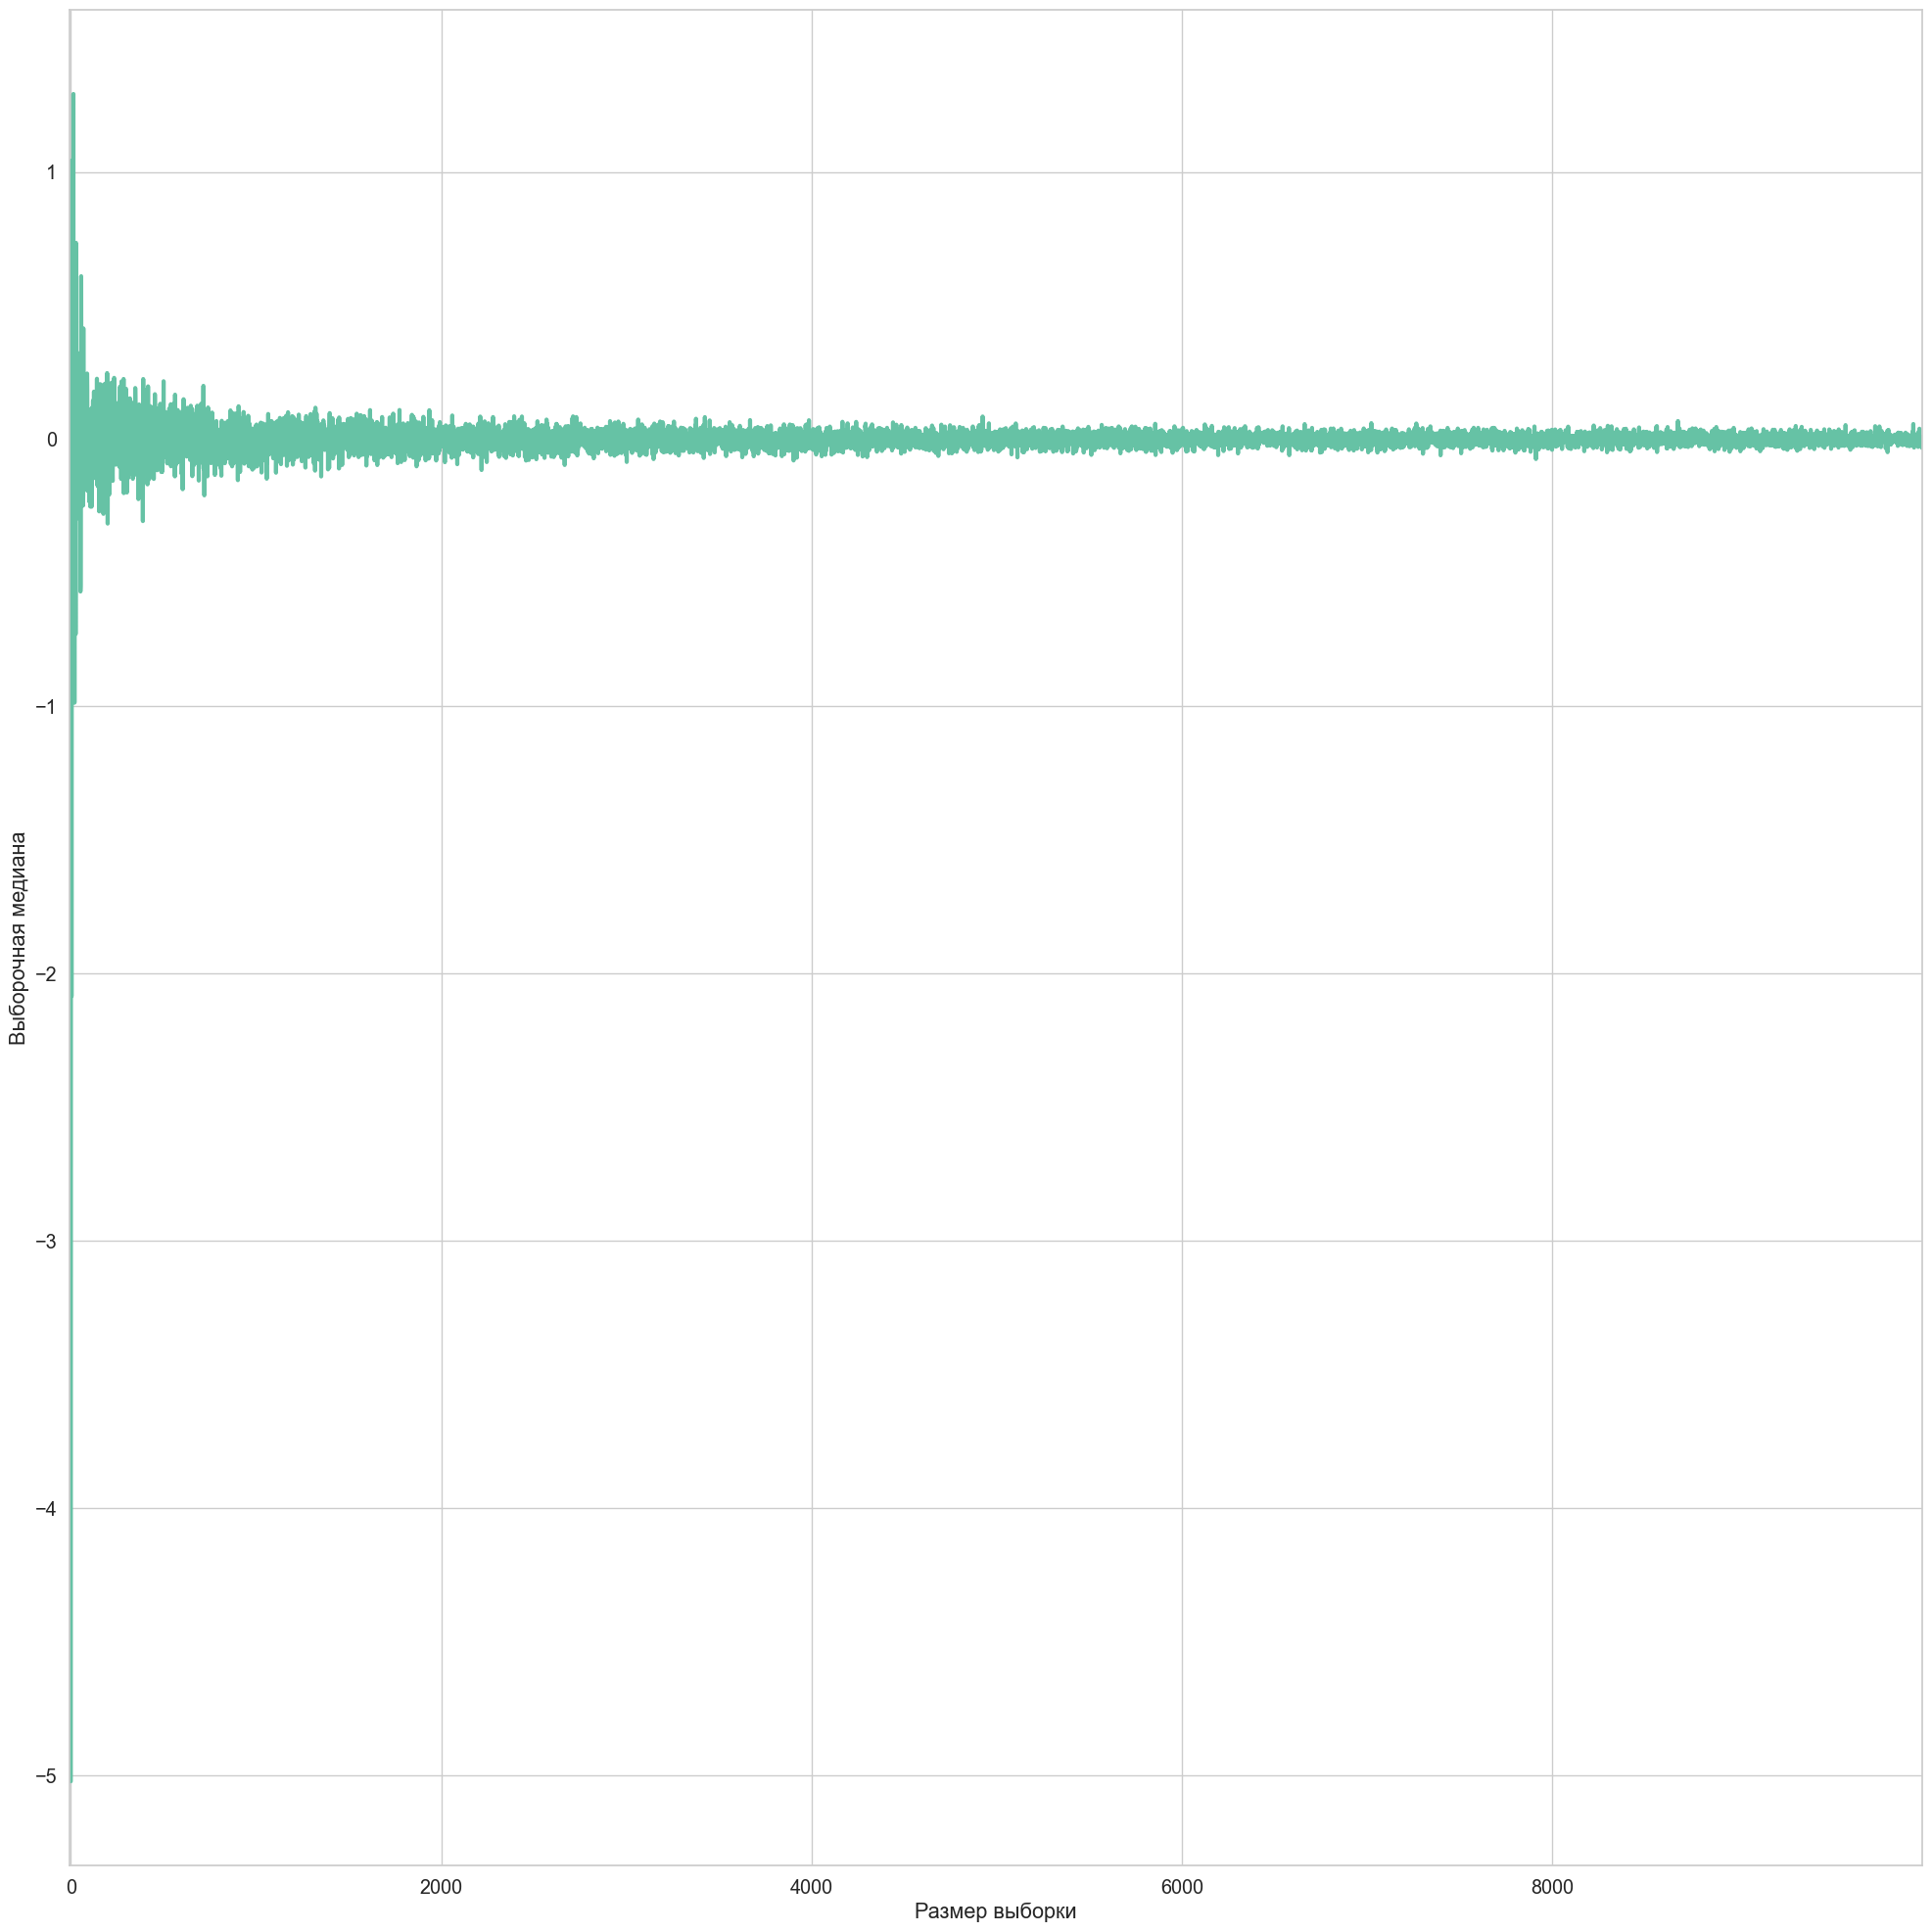

In [12]:
plt.figure(figsize=(20, 20))
median =[]
# эксперименты
for i in range(1, 10000):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=i)
    median.append(np.median(samples))
      
# График
#plt.subplot(5, 2, i+1)
plt.plot(median, lw=3)
plt.xlabel('Размер выборки')
plt.ylabel('Выборочная медиана')
plt.xlim((-5, i))
    
plt.tight_layout()

**Вывод:**

Из проведенного исследоания видим, что плотность распределения Коши убывает медленно при $x \to \infty$, для распределения не выполняется закон больших чисел, значения медианы постепенно приближается к 0 при увеличении размера выборки.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Пример медленной реализации с циклами, более неоптимальные варианты будут дальше:

In [13]:
%%time

K = 500
a = 0.5
F = []
min_F=1
n = 1
while min_F > 0.02: # итерируемся по количеству элементов в выборке
    S =[]
    for j in range(1, K): # итерируемся по выборкам
        samples = sps.bernoulli(p=a).rvs(size=n)
        samples_mean = abs(samples.mean() - a)
        S.append(samples_mean)
    F.append(np.sum(S) / K)
    min_F = min(min_F, np.sum(S) / K)
    n += 1
print(len(F))
df = pd.DataFrame(F, columns=['F'])
df.reset_index(inplace=True)
df.columns = ['n', 'F']
df['n'] = df['n'] + 1
df = df.set_index('n')

363
Wall time: 1min 12s


Пример быстрой реализации c 1 циклом:

In [14]:
%%time

K = 500
a = 0.5
F = []
min_F=1
n = 1
while min_F > 0.02: # итерируемся по количеству элементов в выборке
    samples = sps.bernoulli(p=a).rvs(size=(K, n))
    samples_mean = abs(samples.mean(axis=1) - a)
    F.append(samples_mean.sum() / K)
    min_F = min(min_F, samples_mean.sum() / K)
    n += 1
print(len(F))
df = pd.DataFrame(F, columns=['F'])
df.reset_index(inplace=True)
df.columns = ['n', 'F']
df['n'] = df['n'] + 1
df = df.set_index('n')

359
Wall time: 739 ms


Достаточно быстрая реализация без циклов:

In [15]:
%%time

K = 500
n = np.arange(1, 450, 1)
def F_i(n_i: int, a: float):
    """
    Вычисляет среднее значение модуля отклонения от среднего в зависимости от n и a.
    """
    samples = sps.bernoulli(p=a).rvs(size=(K, n_i))
    samples_mean = abs(samples.mean(axis=1) - a)
    return(samples_mean.sum() / K)
new_F_i = np.vectorize(F_i)
F = new_F_i(n, 0.5)

len_F = np.where (F<=0.02)[0][0]
F = F[0:len_F+1]
print(len_F)
df = pd.DataFrame(F, columns=['F'])
df.reset_index(inplace=True)
df.columns = ['n', 'F']
df['n'] = df['n'] + 1
df = df.set_index('n')

335
Wall time: 1.08 s


Построим графики зависимости $F(n)$ от $n$ в обычном и логарифмическом масштабах.

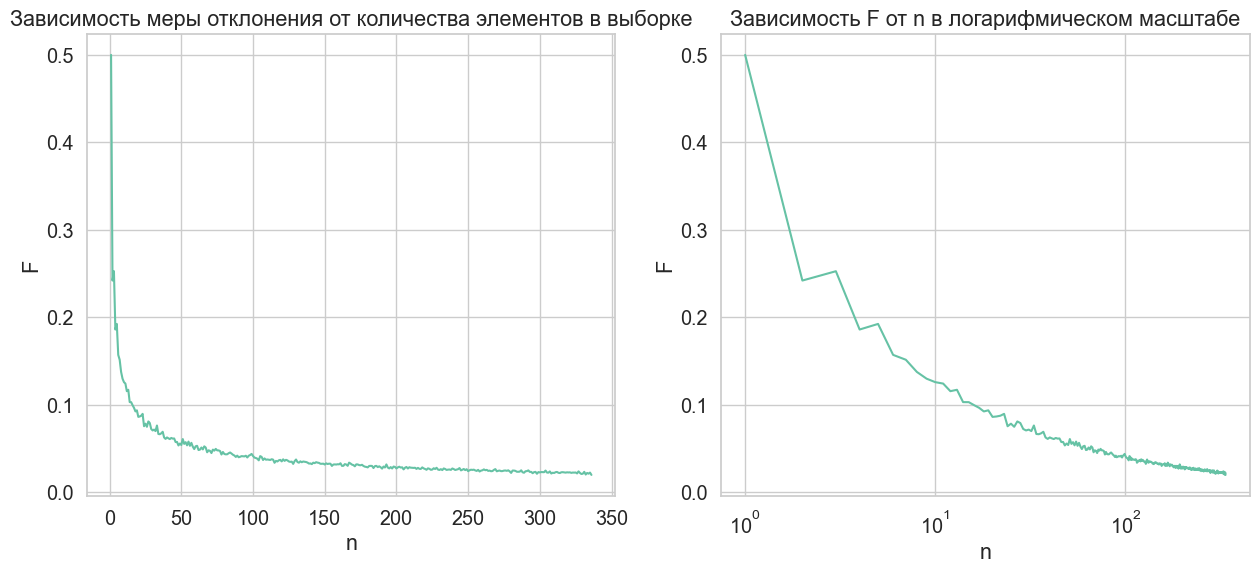

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(df)
plt.xlabel('n')
plt.ylabel('F')
plt.title('Зависимость меры отклонения от количества элементов в выборке')

plt.subplot(122)
plt.plot(df)
plt.xlabel('n')
plt.ylabel('F')
plt.xscale('log')
plt.title('Зависимость F от n в логарифмическом масштабе')

plt.show()

Получили, что первое подходящее значение $n$, когда $F(n) \leqslant 0.02$, получается чаще всего в диапазоне $340-370$. На графиках видно, что с ростом $n$ значение $F(n)$ постепенно уменьшается, скорость уменьшения значения $F(n)$ падает при росте $n$.

**2.** Повторите данный эксперимент для значений $a$ от $0.05$ до $0.95$ с шагом $0.05$. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [17]:
K = 500
a = np.arange(0.05, 1, 0.05)
n = np.arange(1, 450, 1)
min_n = []
for i in range(0, len(a)):
    F = new_F_i(n, a[i])
    len_F = np.where (F<=0.02)[0][0]
    F = F[0:len_F+1]
    min_n.append(len(F))

Визуализируем зависимость необходимого размера выборки $n$ от значения $a$.

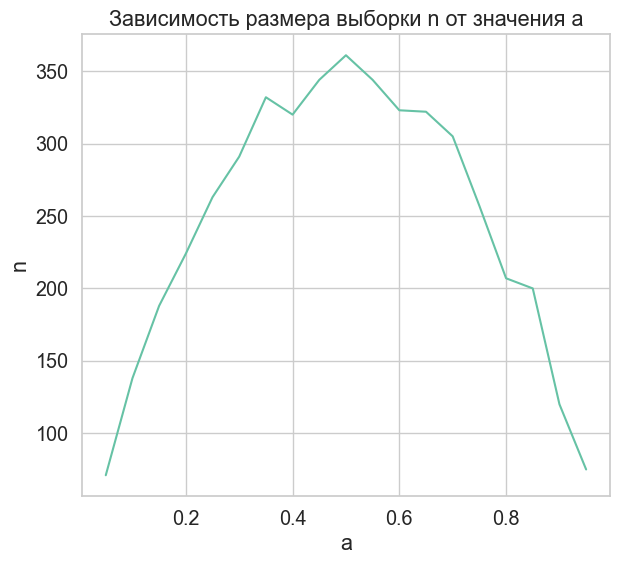

In [18]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(a, min_n)
plt.xlabel('a')
plt.ylabel('n')
plt.title('Зависимость размера выборки n от значения a')

plt.show()

**Выводы:**

Из графика видно, что максимальное значение минимально необходимого размера выборки $n$ для того, чтобы $F(n)$ было $<=0.02$, достигается при $a = 0.5$ (иногда $+- 0.05$) и примерно равняется $360$. Чем дальше значение $a$ находится от $0.5$, тем меньше получается минимально необходимое значение $n$, чтобы $F(n)$ было не больше $0.02$. При крайних значениях $a$ минимально необходимое $n$ примерно равняется $70$. 